# Lab 3

## Image processing - Intesnity Transformation

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

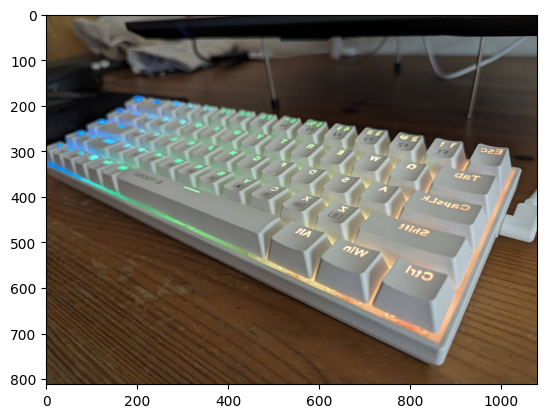

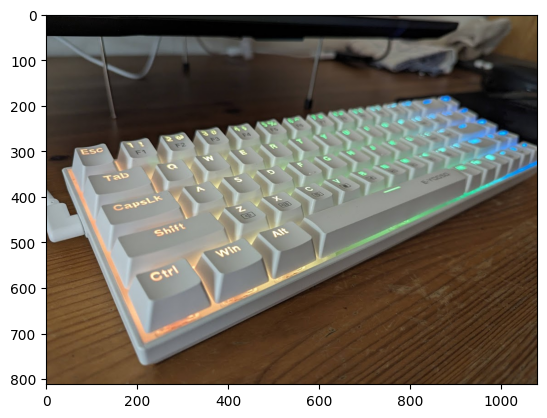

In [2]:
img = cv2.imread('tatiera.jpg')

# Mirrorize reading image backward

height, width = img.shape[:2]
mirrored_image = img[:, width:0:-1]

# Real image
plt.imshow(cv2.cvtColor(mirrored_image, cv2.COLOR_BGR2RGB))
plt.show()

# Mirrorized image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

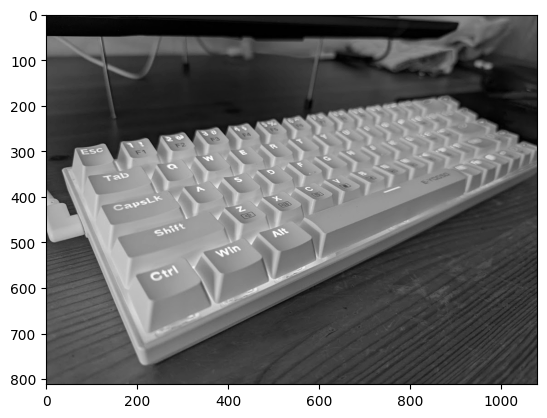

In [3]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

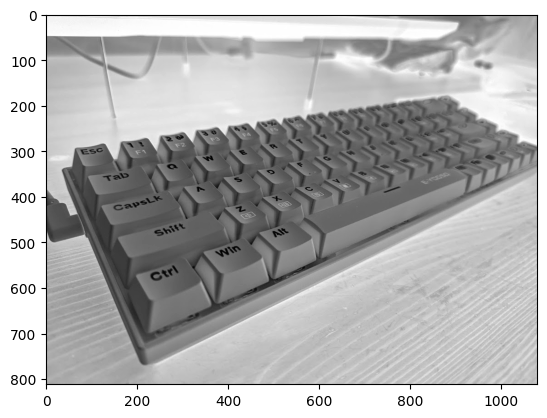

In [4]:
# Negative
new_img = 255 - gray
plt.imshow(new_img, cmap='gray')
plt.show()


## Histogram

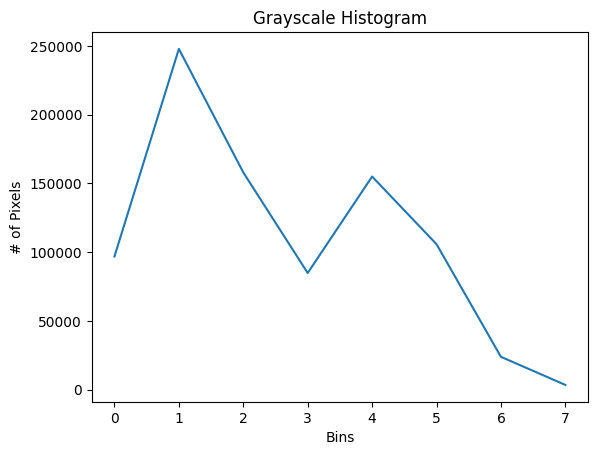

In [5]:
img = cv2.imread('tatiera.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate histogram
hist = cv2.calcHist([gray], [0], None, [8], [0, 256])

# Plot histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)

We can use the method **ravel** to convert an image into a 1D array. This method is useful to create the histogram of an image.

In [6]:
# Print ravel 
print(gray.ravel())
print()
print(gray)

[33 32 23 ... 64 63 61]

[[33 32 23 ... 85 82 97]
 [17 24 21 ... 85 83 94]
 [39 35 28 ... 85 85 90]
 ...
 [86 80 85 ... 61 59 56]
 [86 82 87 ... 63 61 59]
 [87 85 90 ... 64 63 61]]


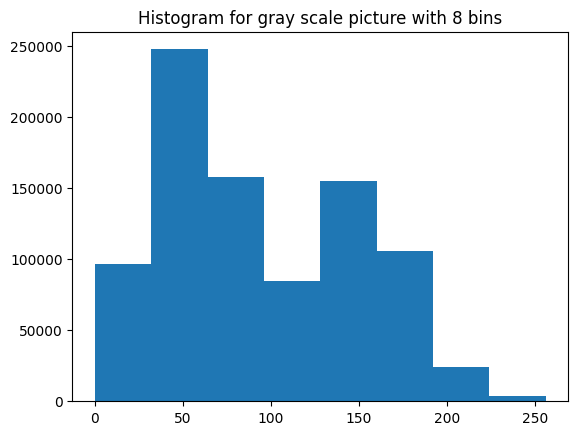

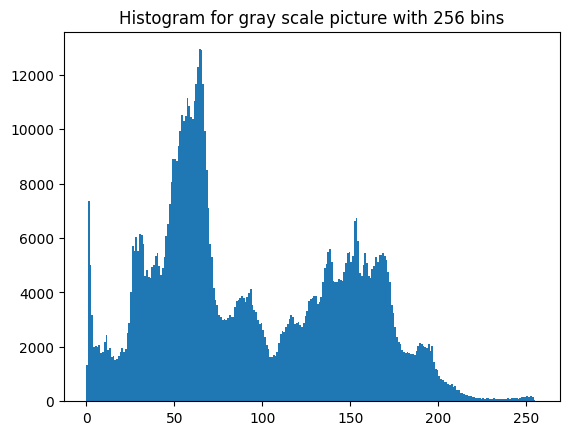

In [7]:
# Another way to plot instogram

plt.figure()
plt.hist(gray.ravel(), 8, [0, 256])
plt.title('Histogram for gray scale picture with 8 bins')
plt.show()

plt.figure()
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Histogram for gray scale picture with 256 bins')
plt.show()



### Hist for colors

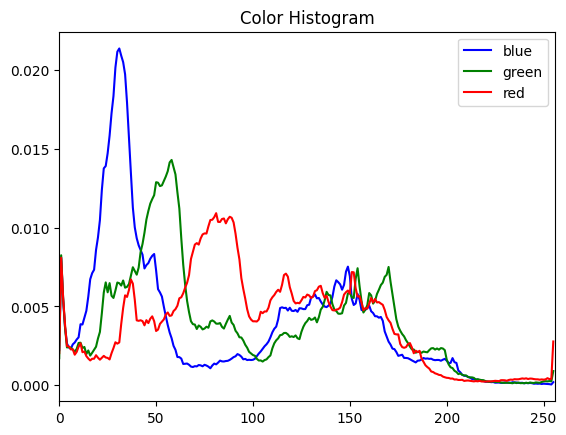

In [8]:
img = cv2.imread('tatiera.jpg')

channels = cv2.split(img)
colors = ('b', 'g', 'r')

plt.figure()
plt.title("Color Histogram")
# for each channel
for (chan,color) in zip(channels, colors):
    # create hist for the current channel we are analyzing
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    hist = hist / hist.sum() # This is done for normalization
    # because the number of pixels in each channel is different
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

plt.legend(['blue', 'green', 'red'])
plt.show()

### Histogrma equalization

This is done in order to increase the range of pixel values in the image. It leads to more uniform histogram.

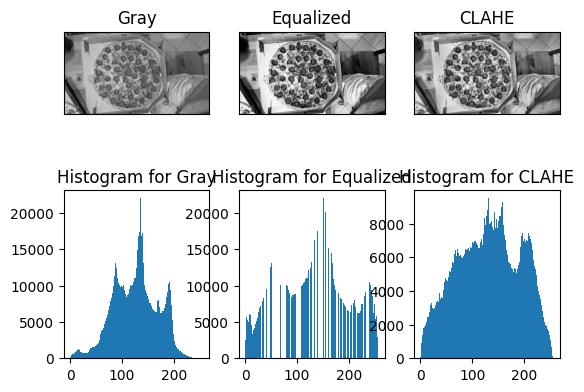

In [13]:
dominos = cv2.imread('dominos.jpg')
gray = cv2.cvtColor(dominos, cv2.COLOR_BGR2GRAY)

# Histrogram equalization using method equalistHist
equalized = cv2.equalizeHist(gray)

# Contrast limited adapted instrogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)

# do a 2x3 subplot for image and its histogram

images = [gray, equalized, clahe_img]
titles = ['Gray', 'Equalized', 'CLAHE']

for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2, 3, i+4)
    plt.hist(images[i].ravel(), 256, [0, 256])
    plt.title('Histogram for ' + titles[i])

plt.show()